In [1]:
from accelerator import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_tune_turn_convergence(lattice):
    scan_turns = [64, 128, 256, 512, 1024, 2048, 5012, 10024]  # np.linspace(100, 5000, 20, dtype=int)
    tunes = []
    for n_turns in scan_turns:
        tunes.append(FODO_thin.tune(n_turns=n_turns))
    plt.plot(scan_turns, tunes)
    plt.xlabel('number of turns')
    plt.ylabel('tune')

# Thin lattice

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

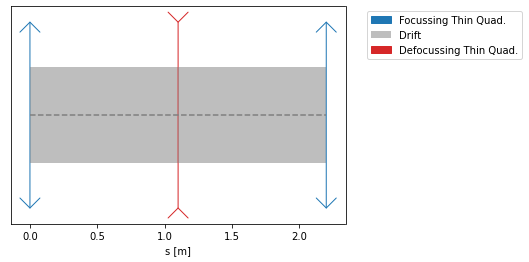

In [3]:
f = 8
l_drift = 1.1

quad_F = QuadrupoleThin(f*2)
quad_D = QuadrupoleThin(-f)
drift = Drift(l_drift)

FODO_thin = Lattice([quad_F, drift, quad_D, drift, quad_F])
lattice_thin = FODO_thin*100
FODO_thin.plot()

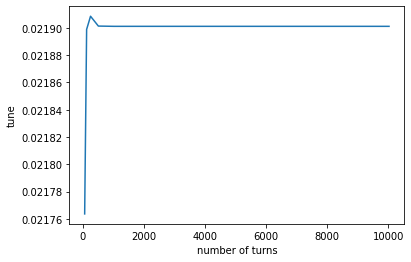

In [4]:
test_tune_turn_convergence(lattice_thin)

In [5]:
FODO_thin.tune()

0.021901080310669507

In [6]:
FODO_thin.chromaticity()

0.021901080310669507
0.02168392856060449


-0.02171517500650158

In [7]:
lattice_thin.tune()

0.19010806544843104

In [8]:
lattice_thin.chromaticity()

0.19010806544843104
0.16839005209581537


-2.171801335261567

In [9]:
def thin_lattice_factory(strength):
    f = 1/strength
    l_drift = 1.1

    quad_F = QuadrupoleThin(f*2)
    quad_D = QuadrupoleThin(-f)
    drift = Drift(l_drift)

    return Lattice([quad_F, drift, quad_D, drift, quad_F])

/home/lcoyle/.cache/pypoetry/virtualenvs/accelerator-7M8YfYAd-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/lcoyle/projects/accelerator/accelerator/elements/base.py:53: RuntimeWarning: overflow encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/accelerator/elements/base.py:53: RuntimeWarning: invalid value encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/accelerator/harmonic_analysis.py:66: RuntimeWarning: invalid value encountered in cdouble_scalars
  delta = delta * np.real((r[km] - r[kp]) / (2 * r[k] - r[km] - r[kp]))
/home/lcoyle/projects/accelerator/accelerator/elements/quadrupole.py:185: RuntimeWarning: overflow encountered in double_scalars
  out[1] = -one_over_f * phase_coords[0] + phase_coords[1]


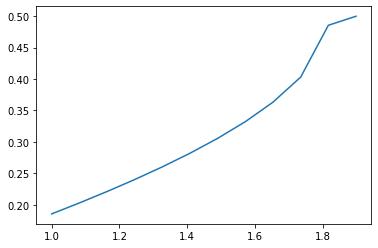

In [10]:
scan_strengths = np.linspace(1, 5, 50)
tunes = []
for strength in scan_strengths:
    tunes.append(thin_lattice_factory(strength).tune())
plt.plot(scan_strengths, tunes)

# Thick elements

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

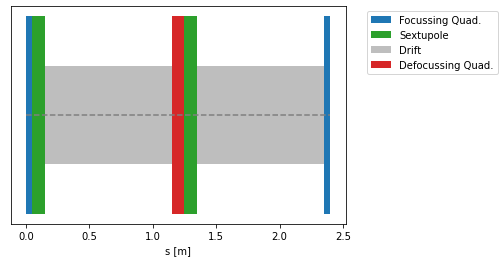

In [11]:
k = 1/0.8
l_quad = 0.1
l_drift = 1

quad_F = Quadrupole(k, l_quad/2)
quad_D = Quadrupole(-k, l_quad)
sext_f = Sextupole(1e-3, 0.1)
sext_d = Sextupole(1e-3, 0.1)
drift = Drift(l_drift)

FODO_thick = Lattice([quad_F,
                      sext_f,
                      drift,
                      quad_D,
                      sext_d,
                      drift,
                      quad_F])
lattice_thick = FODO_thick*100
FODO_thick.plot()

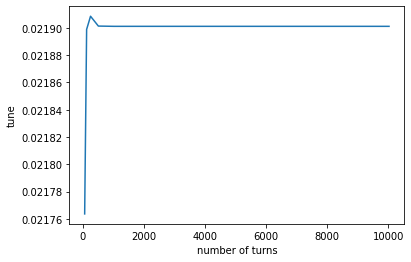

In [12]:
test_tune_turn_convergence(lattice_thick)

In [13]:
quad_F.m

TransferMatrix([[ 0.99843791,  0.04997396,  0.        ,  0.        ,
                  0.        ],
                [-0.06246745,  0.99843791,  0.        ,  0.        ,
                  0.        ],
                [ 0.        ,  0.        ,  1.00156291,  0.05002605,
                  0.        ],
                [ 0.        ,  0.        ,  0.06253256,  1.00156291,
                  0.        ],
                [ 0.        ,  0.        ,  0.        ,  0.        ,
                  1.        ]])

In [14]:
quad_D.m

TransferMatrix([[ 1.00625651,  0.10020846,  0.        ,  0.        ,
                  0.        ],
                [ 0.12526058,  1.00625651,  0.        ,  0.        ,
                  0.        ],
                [ 0.        ,  0.        ,  0.99375651,  0.0997918 ,
                  0.        ],
                [ 0.        ,  0.        , -0.12473975,  0.99375651,
                  0.        ],
                [ 0.        ,  0.        ,  0.        ,  0.        ,
                  1.        ]])

In [15]:
FODO_thick.tune()

0.023221192372282373

In [16]:
FODO_thick.tune(dp=1e-6)

0.023221169109782558

In [17]:
FODO_thick.chromaticity()

0.023221192372282373
0.022991027984900995


-0.023016438738137843

In [18]:
1 - 0.9766619089285522

0.023338091071447797

In [19]:
lattice_thick.tune()

0.32211929857104243

In [20]:
lattice_thick.chromaticity()

0.32211929857104243
0.29908779002020963


-2.30315085508328

In [38]:
lattice_thick.chromaticity(plane='v')

0.3221192985710408
0.2990877900202084


-2.303150855083241

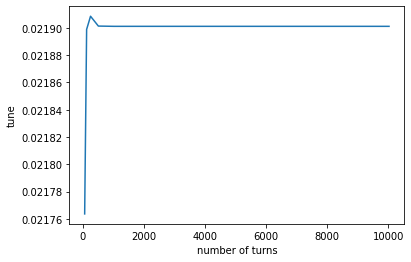

In [21]:
test_tune_turn_convergence(FODO_thick)

# More complex

In [22]:
circumference = 1000
n_cells = 20
cell_length = circumference / n_cells

dipole_length = 5
dipole_angle = 2 * np.pi / (n_cells * 4)
dipole_bending_radius = dipole_length / dipole_angle

quadrupole_length = 3
quadrupole_strength = 1e-2

drift_length = (circumference / n_cells - (2 * quadrupole_length) - (4 * dipole_length)) / 6

In [23]:
dipole = Dipole(dipole_bending_radius, dipole_angle)
quad_f = Quadrupole(quadrupole_strength, quadrupole_length, name='quad_f')
quad_d = Quadrupole(-quadrupole_strength, quadrupole_length, name='quad_d')
drift = Drift(drift_length)
drift_half = Drift(drift_length / 2)

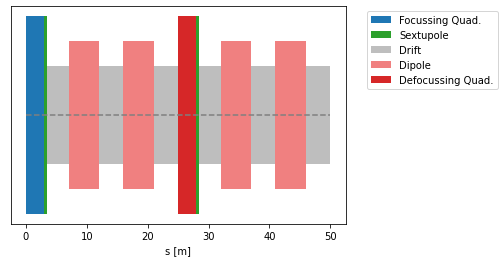

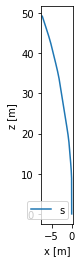

In [24]:
l_sext = 0.5
k_sext_f = 1e-3
k_sext_d = -1e-3
sext_f = Sextupole(k_sext_f, l_sext, name="sextupole_f")
sext_d = Sextupole(k_sext_d, l_sext, name="sextupole_d")
FODO_sext = Lattice([quad_f,
                     sext_f,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     quad_d,
                     sext_d,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     ])
FODO_sext.plot()
FODO_sext.plot.top_down()
lattice_sext = FODO_sext * n_cells

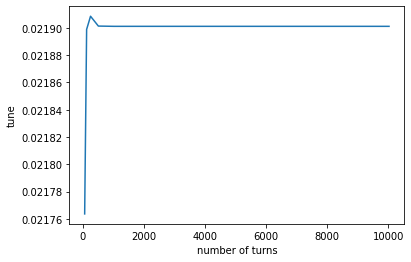

In [25]:
test_tune_turn_convergence(lattice_sext)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

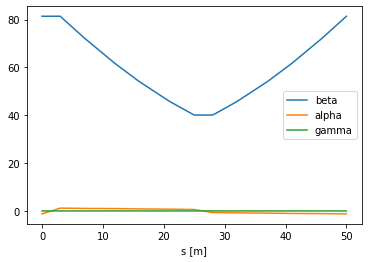

In [26]:
FODO_sext.twiss('h').plot()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='s [m]', ylabel='x [m]'>)

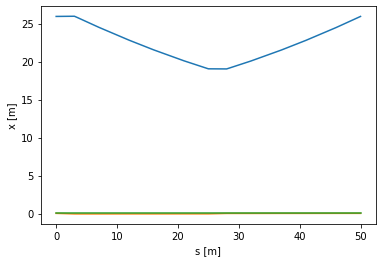

In [27]:
FODO_sext.dispersion().plot('h')

In [28]:
FODO_sext.tune(dp=0)

0.14219268309131744

In [29]:
FODO_sext.tune(dp=1e-3)

0.14213935606853564

In [30]:
lattice_sext.tune()

0.15614625967644247

In [31]:
lattice_sext.tune(dp=1e-3)

0.15721297825081992

In [32]:
FODO_sext.chromaticity()

0.14219268309131744
0.14167299580300563


-0.05196872883118098

In [33]:
FODO_sext.chromaticity('v')

0.11711163544495258
0.11609336126911259


-0.10182741758399949

In [34]:
lattice_sext.chromaticity()

0.15614625967644247
0.16654166183767585


-1.0395402161233358

In [35]:
lattice_sext.chromaticity('v')

0.34223270262629996
0.3218663358343823


-2.0366366791917665

In [36]:
lattice_sext.transport()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed